# Comparison predicted FROS between Vesta Mk 2 (Cruz et al 2022), Vesta (Cheney et al 2012) and Vesta (Gould et al. 2008)

Data sets compared:
 - Lach Lamond Point Forecast20211219 - 20211226
 - Kempsey AWS 20191107 - 20191113
 - Deans Gap Point Forecast 20130107 - 20130110

Analysis using [PyroPy](https://pypi.org/project/PyroPy/)

In [1]:
from pyropy import firebehaviour as fb
from pyropy import weatherdata as wd
import matplotlib.pyplot as plt

set some standard params

In [2]:
params = {
    'waf': 3,
    'fuel_load': 14,
    'fhs_surf': 3,
    'fhs_n_surf': 2,
    'fuel_height_ns': 50,
    'fuel_height_u': 0.8
}


## Lach Lamond 20211219 to 20211226

note: Lach Lamond is a mallee environment so the predicted FROS values can't be compared to the actual fire.

In [5]:
lach_lamond_weather = wd.gridded_to_df('Loch_Lamond2112.csv')
lach_lamond = fb.Incident(lach_lamond_weather)
lach_lamond.set_params(params)
lach_lamond.run_forest_vesta2()
lach_lamond.run_forest_vesta()
lach_lamond.run_forest_vesta_08()

lach_lamond.print(head=True)


            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi     mc_v      fM_d      fFA        fM   vesta2_r1  vesta2_p2  \
0     1  6.71723  0.807873  0.97678  0.789115  225.446214   0.999671   
1     1  6.77132  0.803111  0.97678  0.784463  180.842123   0.998093   
2     1  7.38899  0.747711  0.97678  0.730350  208.657348   0.999332   
3     2  7.33080  0.752993  0.97678  0.735509  328.223550   0.999996   
4     4  6.85550  0.795665  0.97678  0.777190  441.161832   1.000000   

     vesta2_r2  vesta2_p3    vesta2_r3  fros_vesta2  fros_vesta  fros_vesta_08  
0   645.321018   

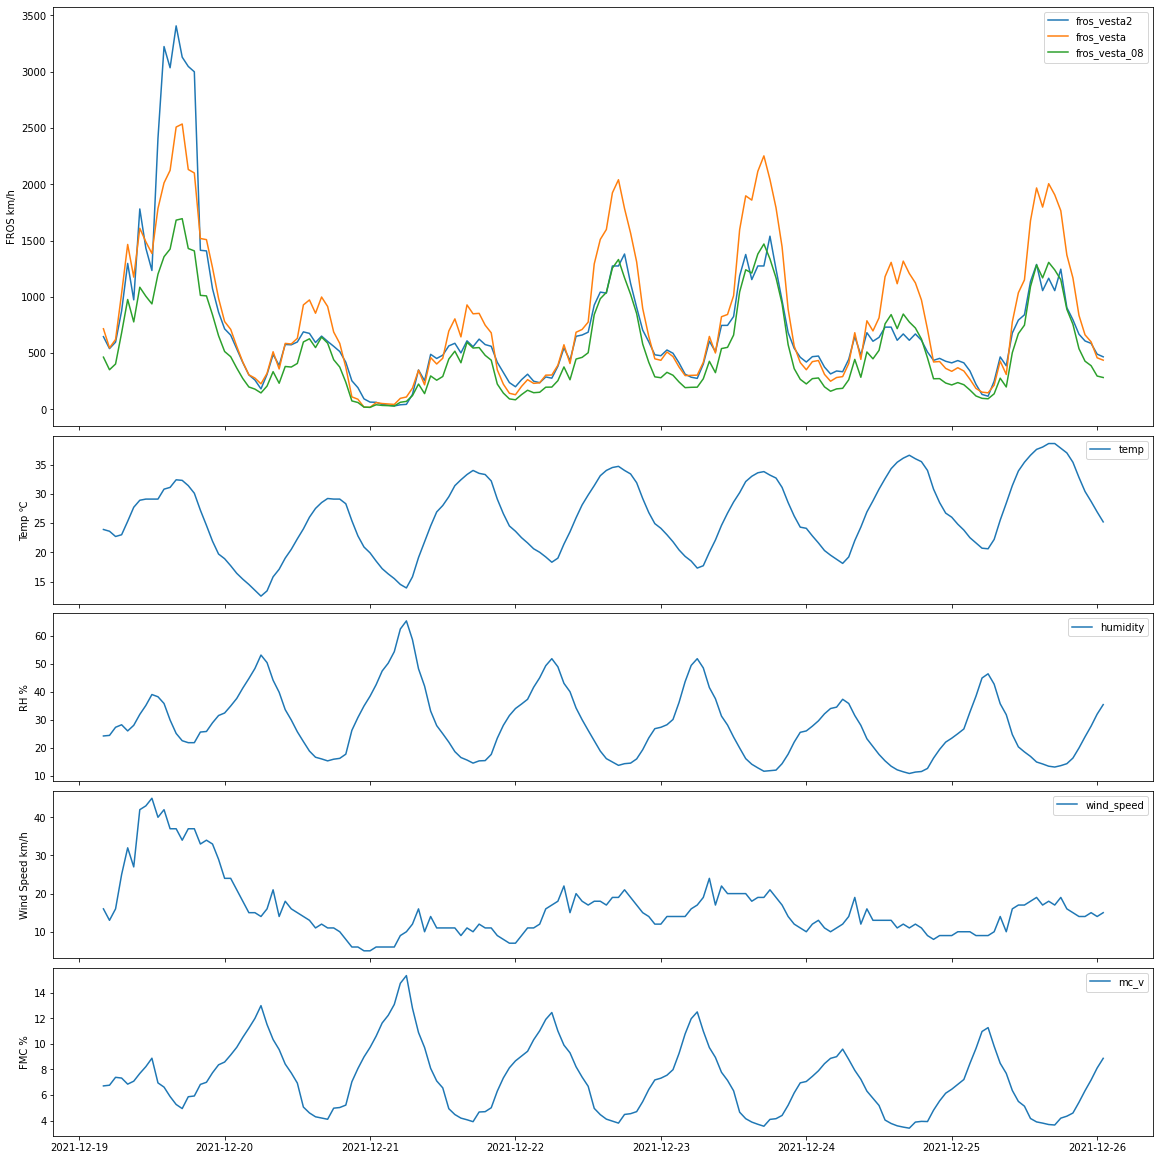

In [20]:
incident = lach_lamond
fig, (ax_fros, ax_temp, ax_rh, ax_wind, ax_mc) = plt.subplots(
    5,1, sharex=True,constrained_layout=True, 
    figsize=(16,16),
    gridspec_kw={'height_ratios': [2.5, 1, 1, 1, 1]}

)

ax_dict = {
    'FROS km/h': [ax_fros, ('fros_vesta2', 'fros_vesta', 'fros_vesta_08')],
    'Temp \u2103': [ax_temp, ('temp',)],
    'Wind Speed km/h': [ax_wind, ('wind_speed',)],
    'RH %': [ax_rh, ('humidity',)],
    'FMC %': [ax_mc, ('mc_v',)],
}

for label, [ax, (fields)] in ax_dict.items():
    for field in fields:
        ax.plot(incident.df['date_time'],incident.df[field], label=field)
    ax.set_ylabel(label)
    ax.legend(loc='upper right')


plt.show()

## Deans Gap

In [19]:
deans_gap_weather = wd.gridded_to_df('Deans_Gap_IgnitionPoint_Fcst.csv', header=3)
deans_gap = fb.Incident(deans_gap_weather)
deans_gap.set_params(params)
deans_gap.run_forest_vesta2()
deans_gap.run_forest_vesta()
deans_gap.run_forest_vesta_08()

deans_gap.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  \
0 2013-01-07 05:00:00  17.5      93.9           5       168      9.7   
1 2013-01-07 06:00:00  17.5      94.5           3       166      9.7   
2 2013-01-07 07:00:00  17.7      92.7           2       162      9.7   
3 2013-01-07 08:00:00  18.4      87.0           2       160      9.7   
4 2013-01-07 09:00:00  19.8      78.3           4       123      9.7   

       mc_v      fM_d       fFA        fM  vesta2_r1  vesta2_p2  vesta2_r2  \
0  20.82695  0.164034  0.995454  0.163288  12.272432   0.003059  51.108412   
1  20.94575  0.162206  0.995454  0.161469   4.844057   0.000963  33.147297   
2  18.46980  0.180569  0.995454  0.179748   5.392432   0.000681  26.401383   
3  17.47500  0.186014  0.995454  0.185168   5.555053   0.000727  27.197579   
4  15.94170  0.205275  0.995454  0.204341  10.985986   0.002847  53.195795   

      vesta2_p3  vesta2_r3  fros_vesta2  fros_vesta  fros_vesta_08  
0  3.277963e-12  58.148656   

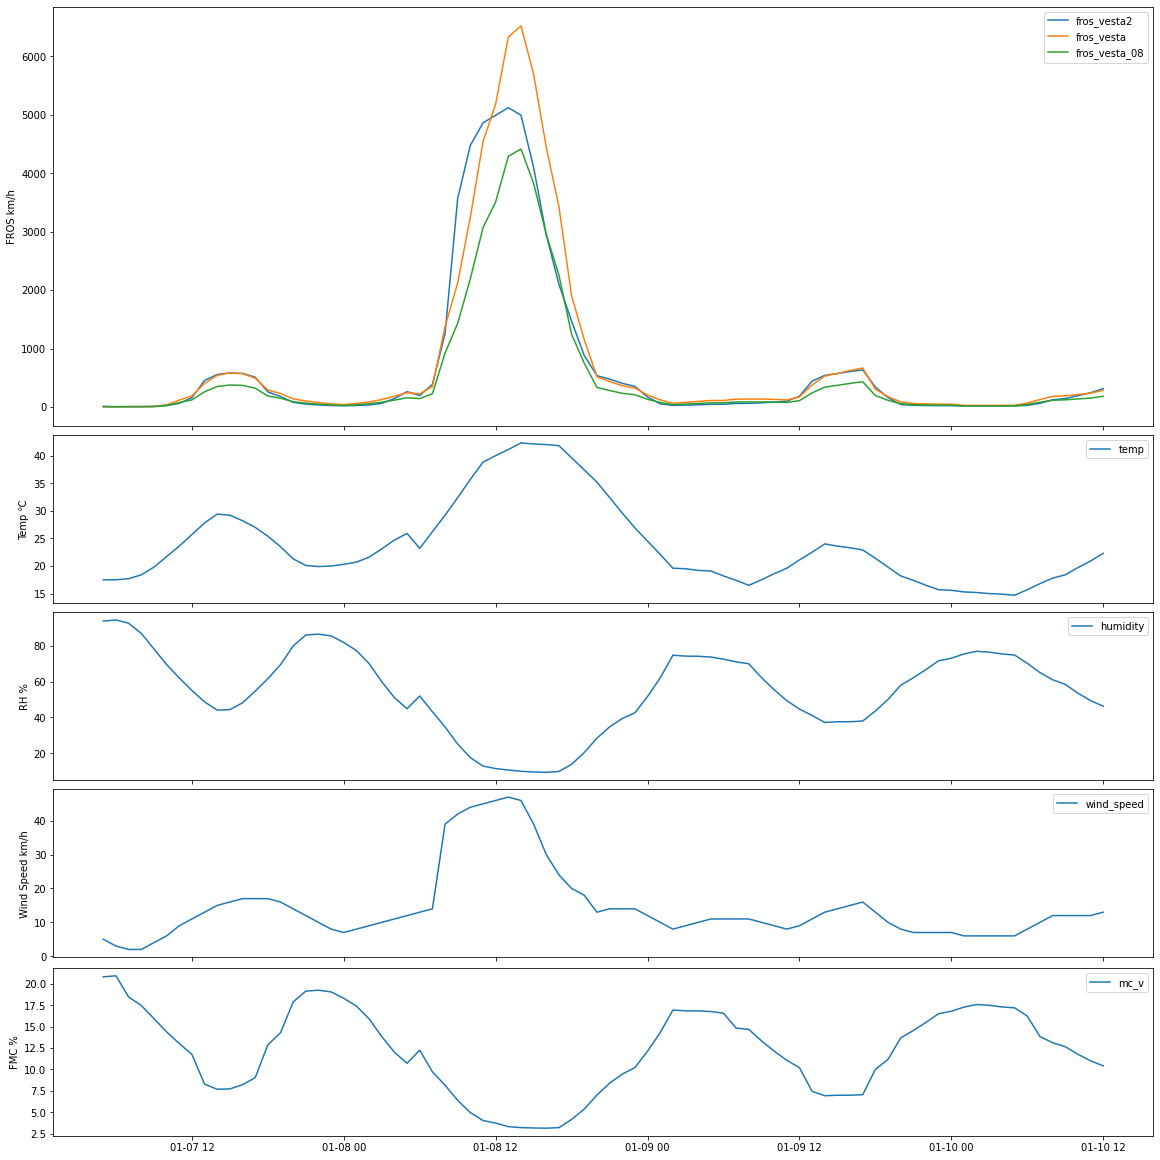

In [21]:
incident = deans_gap
fig, (ax_fros, ax_temp, ax_rh, ax_wind, ax_mc) = plt.subplots(
    5,1, sharex=True,constrained_layout=True, 
    figsize=(16,16),
    gridspec_kw={'height_ratios': [2.5, 1, 1, 1, 1]}

)

ax_dict = {
    'FROS km/h': [ax_fros, ('fros_vesta2', 'fros_vesta', 'fros_vesta_08')],
    'Temp \u2103': [ax_temp, ('temp',)],
    'Wind Speed km/h': [ax_wind, ('wind_speed',)],
    'RH %': [ax_rh, ('humidity',)],
    'FMC %': [ax_mc, ('mc_v',)],
}

for label, [ax, (fields)] in ax_dict.items():
    for field in fields:
        ax.plot(incident.df['date_time'],incident.df[field], label=field)
    ax.set_ylabel(label)
    ax.legend(loc='upper right')


plt.show()

## Kempsey

In [22]:
aws = {
    'date_time': 'Date/Time (EDT)',
    'temp': 'Temp (deg C)',
    'humidity': 'RH (%)',
    'wind_dir': 'Wind Direction',
    'wind_speed': 'Wind Speed (km/h)',
    'drought': 'DF',
}
aws_dt_format = '%Y/%m/%d %H:%M'
kempsey_weather = wd.weather_to_df('Kempsey_AWS_7to13Nov19.csv', col_names=aws, datetime_format=aws_dt_format)
kempsey = fb.Incident(kempsey_weather)
kempsey.set_params(params)
kempsey.run_forest_vesta2()
kempsey.run_forest_vesta()
kempsey.run_forest_vesta_08()

kempsey.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  \
0 2019-11-07 00:00:00  10.9        94           4       280       10   
1 2019-11-07 00:30:00  10.2        96           0         0       10   
2 2019-11-07 01:00:00  11.1        95           5       290       10   
3 2019-11-07 01:30:00   9.6        97           4       210       10   
4 2019-11-07 02:00:00   8.5        99           8       250       10   

       mc_v      fM_d       fFA        fM  vesta2_r1  vesta2_p2  vesta2_r2  \
0  21.16553  0.158379  0.998481  0.158138   8.501971   0.001631  41.167823   
1  21.59534  0.148990  0.998481  0.148764   4.462907   0.000151   0.000000   
2  21.35387  0.154595  0.998481  0.154360  11.601459   0.002747  48.314155   
3  21.82232  0.142869  0.998481  0.142652   7.669395   0.001353  37.136362   
4  22.27145  0.128002  0.998481  0.127807  17.320642   0.010856  58.970394   

      vesta2_p3  vesta2_r3  fros_vesta2  fros_vesta  fros_vesta_08  
0  2.124923e-12  43.169384   

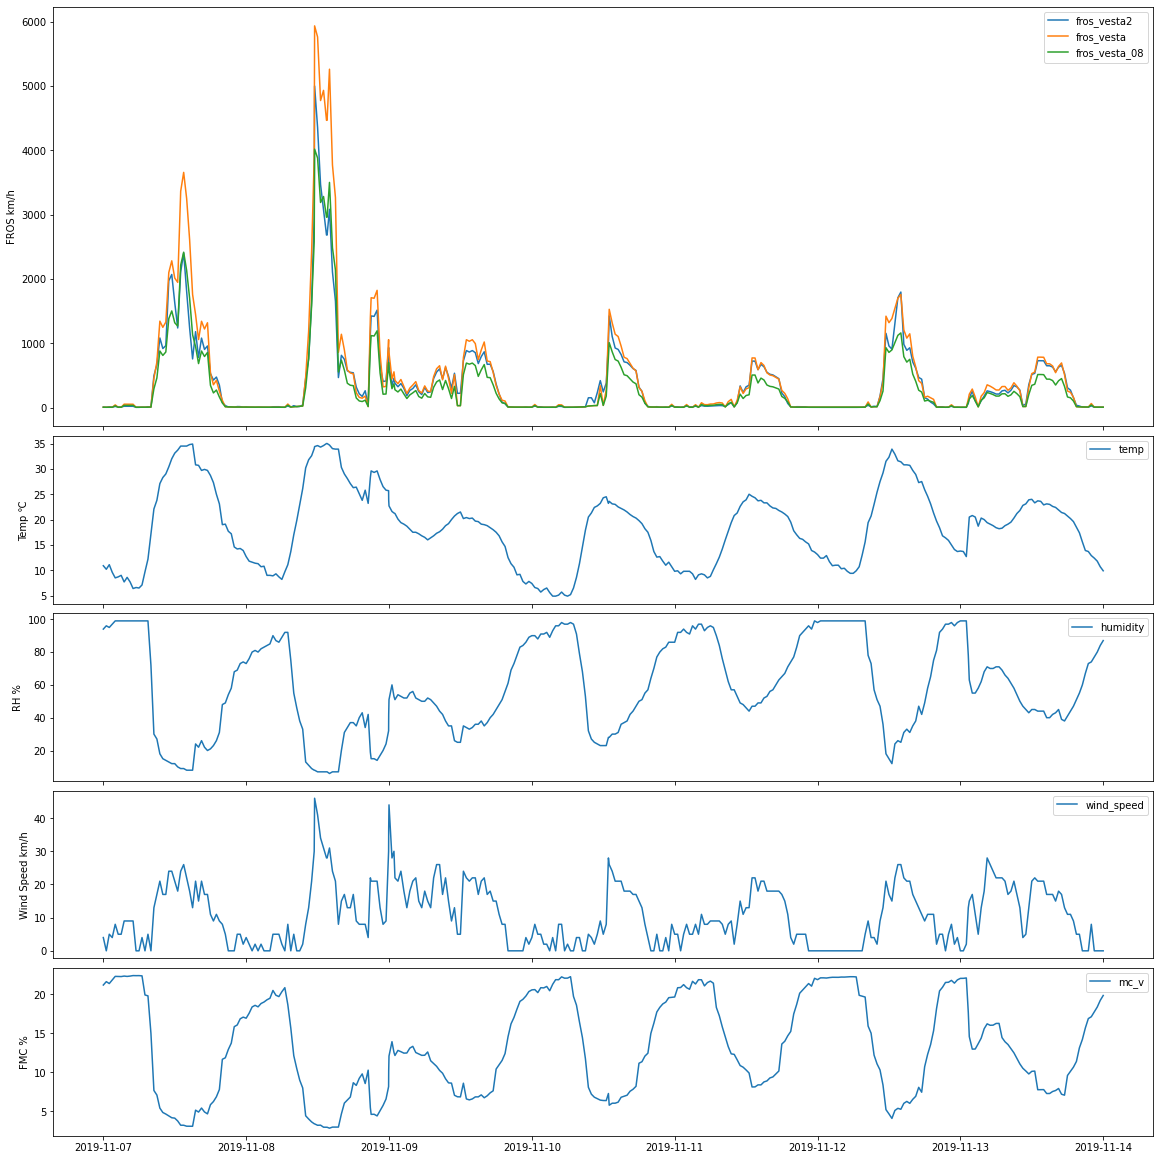

In [23]:
incident = kempsey
fig, (ax_fros, ax_temp, ax_rh, ax_wind, ax_mc) = plt.subplots(
    5,1, sharex=True,constrained_layout=True, 
    figsize=(16,16),
    gridspec_kw={'height_ratios': [2.5, 1, 1, 1, 1]}

)

ax_dict = {
    'FROS km/h': [ax_fros, ('fros_vesta2', 'fros_vesta', 'fros_vesta_08')],
    'Temp \u2103': [ax_temp, ('temp',)],
    'Wind Speed km/h': [ax_wind, ('wind_speed',)],
    'RH %': [ax_rh, ('humidity',)],
    'FMC %': [ax_mc, ('mc_v',)],
}

for label, [ax, (fields)] in ax_dict.items():
    for field in fields:
        ax.plot(incident.df['date_time'],incident.df[field], label=field)
    ax.set_ylabel(label)
    ax.legend(loc='upper right')


plt.show()